In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy.stats import gamma, norm, expon
from ipywidgets import interact

In [197]:
customers = {'Slugworth': {'std': 100, 'growth': 0, 'shape': 'none'}, 
             'Perk-a-Cola': {'std': 100, 'growth': 1.2, 'shape': 'log'},
             'Fickelgruber': {'std': 100, 'growth': 1.1, 'shape': 'linear'}, 
             'Zebrabar': {'std': 200, 'growth': -.2, 'shape': 'linear'},
             "Dandy's Candies": {'std': 50, 'growth': 0.5, 'shape': 'log'}}

years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018','2019', '2020' ]
months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

dates = []
for year in years:
  for month in months:
    dates.append(month + '/' + year)

In [233]:
def make_order(kg, customer, months):
    # 2 Xxxxxx
    # 3 Xxxx
    # 4 Xxx
    # 6 Xx
    # X = amp * x
    # X*patt[0] + x*patt[1] = kg
    # amp*x*patt[0]+x*patt[1] = kg
    # x = kg/(amp*patt[0]+patt[1])

    amps = [1.5, 2, 1.2, 1.12, 1.32, 1.56, 1.89]
    patterns = [[6,6], [4,8], [3,9], [2,10]]

    amp = random.choice(amps)
    pattern = random.choice(patterns)

    x = kg/(amp*pattern[0]+pattern[1])
    X = amp * x
    orders = [X + norm.rvs(1, scale=customers[customer]['std'])
    if (i % (12/pattern[0]) == 0) else x
    + norm.rvs(1, scale=customers[customer]['std']) for i in range(months) ]

    if customers[customer]['shape'] == 'none':
        pass
    elif customers[customer]['shape'] == 'linear':
        orders = (np.array(range(20,months+20)))*np.array(orders)/months*4
    elif customers[customer]['shape'] == 'log':
        orders = (np.log(np.array(range(20,months+20))))*np.array(orders)
    else:
        print('what?')
    return orders

[6, 6]


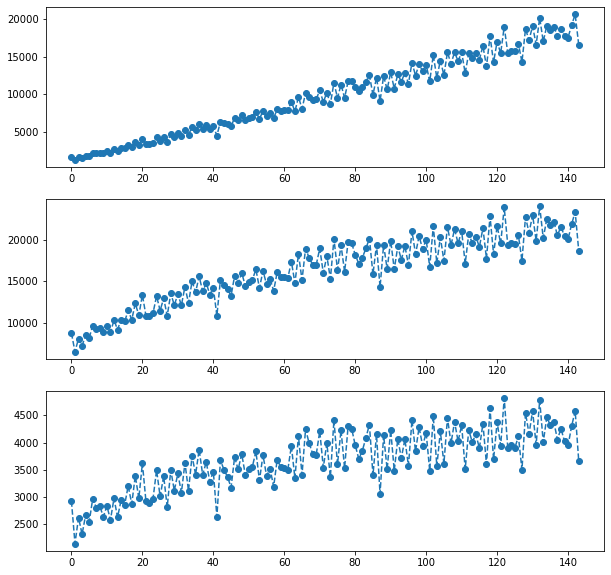

In [215]:
kg = 1e4
customer = "Dandy's Candies"
months = 144

amps = [1.5, 2, 1.2, 1.12, 1.32, 1.56, 1.89]
patterns = [[6,6], [4,8], [3,9], [2,10]]

amp = random.choice(amps)
pattern = random.choice(patterns)
print(pattern)

x = kg/(amp*pattern[0]+pattern[1])
X = amp * x
orders = [X + norm.rvs(1, scale=customers[customer]['std'])
if (i % (12/pattern[0]) == 0) else x
+ norm.rvs(1, scale=customers[customer]['std']) for i in range(months) ]

orders
fig, ax = plt.subplots(3, 1, figsize=(10,10))

if customers[customer]['shape'] == 'none':
    pass
elif customers[customer]['shape'] == 'linear':
    orders = (np.array(range(20,months+20)))*np.array(orders)/months*4
elif customers[customer]['shape'] == 'log':
    orders = (np.log(np.array(range(20,months+20))))*np.array(orders)
else:
    print('what?')
    
ax[0].plot((np.array(range(20,months+20)))*np.array(orders)/months*4, ls='--', marker='o')
ax[1].plot((np.log(np.array(range(20,months+20))))*np.array(orders), ls='--', marker='o')
ax[2].plot(np.array(orders), ls='--', marker='o')

In [20]:
from truffletopia import Truffle, UnitOperation, load_data

In [234]:
master = {}
index = 0
for index in range(100):
    customer = random.choice(list(customers.keys()))
    kg = random.randint(1e4, 1e5)
    months = 144
    orders = make_order(kg, customer, months)
    truffle = Truffle()
    truffle.set_attributes()

    master[index] = truffle.__dict__
    master[index]['customer'] = customer
    a = {i: j for i,j in zip(dates,orders)}
    master[index].update(a)

In [237]:
master = pd.DataFrame(master).T

In [238]:
master.to_csv('12_year_orders.csv', index=False)

In [21]:
load_data("operations.csv")

,Category,Classification,Mean,Std,Distribution
0,base_cake,Tiramisu,0.230,2.564,normal
1,base_cake,Sponge,0.794,1.064,normal
2,base_cake,Pound,0.141,1.526,normal
3,base_cake,Chiffon,0.047,1.459,normal
4,base_cake,Cheese,0.361,1.483,normal
...,...,...,...,...,...
96,color_group,Black,0.201,2.699,normal
97,color_group,Rose,0.087,1.511,normal
98,color_group,Slate,1.501,0.163,normal
99,color_group,Citrine,-1.354,0.001,normal
